<h1>Video game factors that will Help Determine their Success.</h1>


<p>The online shop Ice sells video games worldwide. These people want to understand which factors will help figure out how successful or even unsuccessful a video game will become globally. Ice provided data regarding video games through open sources that will contain home user and professional reviews, genres, video gaming platforms, and historic data on sales. First, the particular information will be explored and any kind of discrepancies or unacceptable data will be modified. Primarily, any lacking values or wrong data types will certainly be corrected. Once the particular data is ready for analysis, the particular global sales will definitely be calculated for every video game simply by summing the local sales together. (NA, EU, JP, Other). Using the total product sales obtained, the specific information analysis can start. Certain data will certainly be plotted plus observed for any kind of patterns that show helpful in identifying whether a video game will be successful or not. Finally, two ideas will be examined concerning user rankings by platform and genre. Also, to understand if the typical user ratings associated with the Xbox 1 and PC systems are the exact same, and when the particular average user rankings for the Actions and styles are very varied. This will become the last evaluation step before the particular report is covered plan the common conclusion.</p>

<h2>Import Libraries</h2>

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats as st

<h2> Load the Data</h2>


In [2]:
# read the data games.csv
games = pd.read_csv('games.csv')

<h2>Exploring the data</h2>


In [3]:
# Print the general/summary information about the data
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


There are `16,715` rows in the dataset. However, it can be seen that some columns contain null (missing) values since their reported non-null values are less than `16,715`. The following columns are missing data:

* Name
* Year_of_Release
* Genre
* Critic_Score
* User_Score
* Rating

One of the most notable problems is that the `'User_Score'` and `'Rating'` columns are missing nearly a third of their values. This will need to be investigated further to determine if the missing values can be filled in or if the columns should be dropped.

When looking at data types, the `'Year_of_Release'` column should contain integers, and the `'User_Score'` column should contain float64 values. However, the `'Year_of_Release'` column contains values of the float64 data type, and the `'User_score'` column contains values of the object data type. These two data types will need to be convereted to more suitable data types.

In [4]:
# Print the first 20 rows of the data
games.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


The data presented in the first 20 rows of the dataframe is as expected. However, when looking at the values stored in the `'Critic_Score'` column, it can be seen that the values are really just integers stored as float64 values. Therefore, the data type for the `'Critic_Score'` column can be converted to an integer data type. This will be done in the next section while the missing values are replaced.

<h2> Fixing the Data</h2>

First step in fixing the data we will change the column names to lower case. Such a change avoids having to capitalize letters when calling columns or variables, which can save some time in the long run. 

In [5]:
# Change the column names to all lowercase
games.columns = games.columns.str.lower()

# Display the column names
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Time to start looking at each column missing data and address it. First column we will start with is the `'name'` column.

In [6]:
# Display missing values in name column
games[games['name'].isnull()]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


With only 2 names missing in the overall dataset which is 0.01%. We can safely drop the rows with missing values as it will have no impact of the findings.

In [7]:
# Remove the name rows with missing values
games.dropna(subset=['name'], inplace=True)

Next column will be `'year_of_release'`.

In [8]:
 # Display missing values in year_of_release column
games[games['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Just like with above section, we have 269 missing values which is %1.61 of the entire dataset. We can safely drop the rows with missing values.

In [9]:
# Remove the year_of_release rows with missing values
games.dropna(subset=['year_of_release'], inplace=True)

Now let's address the data type of the `'year_of_release'` column, which is currently the float64 data type. Since the values represent years, we will convert all the values in the `'year_of_release'` column to integers.

In [10]:
# cheange the year_of_release column to integer
games['year_of_release'] = games['year_of_release'].astype('int')

Now lets look at the `'genre'` column.

In [11]:
# Check for missing values
games[games['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


It appears that after removal of the rows that contained missing values in the `'name'` or `'year_of_release'` columns, that there are no remaining rows that contain missing values in the `'genre'` column. No futher action is required.

Next up is the `'critic_score'` column.

In [12]:
# Display missing values in critic_score column
games[games['critic_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


As we can see we are missing 50% of the data for the `'critic_score'`. For now we will leave the data nan for the fact that we cannot properly guess the values.

In [13]:
# Fill the missing values in critic_score with interpolated values
#games['critic_score'] = games['critic_score'].interpolate().round(2)

In [14]:
# check the missing values in critic_score column
games[games['critic_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Next up is the `'user_score'` column.

In [15]:
# Display missing values in user_score column
games[games['user_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


With `'user_score'` we are missing 39% of the data. First, we have some values labeled as `'tbd'` we will have to address this. Then as before becuase we cannot acuratly guess the scores we will leave them as nan.

In [16]:
# Check if tbd values in user_score column
games[games['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


To address the `'tbd'` in the values we will replace it with `'nan'`, and convert everything back to a float.

In [17]:
# replace tbd values with NaN
games['user_score'] = games['user_score'].replace('tbd', np.nan)

In [18]:
# change the user_score column to float
games['user_score'] = games['user_score'].astype('float')

In [19]:
# Fill the missing values in user_score with interpolated values 
#games['user_score'] = games['user_score'].interpolate().round(2)

In [20]:
# check the missing values in user_score column
games[games['user_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Time for the `'rating'` column.

In [21]:
# Display missing values in rating column
games[games['rating'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Again about 39% of the data is missing so we will fill it with `'unkown'` for right now.


In [22]:
# fill the missing values in rating column with 'unknown'
games['rating'] = games['rating'].fillna('unknown')

In [23]:
# Get a count of the values in the rating column
games['rating'].value_counts()

unknown    6676
E          3921
T          2905
M          1536
E10+       1393
EC            8
K-A           3
RP            1
AO            1
Name: rating, dtype: int64

Looking at the values of the ratings we can see we have a few ratings that have less than 10 values. Doing some research I can tell that some of the ratings are from different rating systems around the world. We will combine these values with the popular counter parts. Also we will change the `'unknown'` values to the `'RP'` value for rating pending.

In [24]:
# Change ratings EC to E and K-A to T and AO to M and RP to unknown
games['rating'] = games['rating'].replace('EC', 'E')
games['rating'] = games['rating'].replace('K-A', 'T')
games['rating'] = games['rating'].replace('AO', 'M')
#games['rating'] = games['rating'].replace('unknown', 'RP')

Now that the data is fixed and ready for use, let's add some additional information that will assist in the data analysis.It is important to know how global sales of each video game compare to one another. So, an additional column will be added to the `games` DataFrame that contains the sum of the sales from all the regions for each video game.

In [25]:
# Create a new column total_sales
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [26]:
# Display the first 20 rows of the data
games.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown,28.31


In [27]:
# check dataframe for duplicates
duplicateRows = games[games.duplicated()]
display(duplicateRows)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


<h2> Observation on missing data </h2>


Missing data can occur when no data value is stored for a variable, or the information is just not available at the time the data was gathered. 

<h2> Analyzing the data </h2>

Let's take a look at video game and sales distribution. First, let see how many video games were released in each distinct year.

In [28]:
# Create a pivot table showing how many video games were released for each distinct year
games.pivot_table(index='year_of_release', values='name', aggfunc='count')

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Let's get a visual representation of this data by plotting the above pivot table as a bar chart.

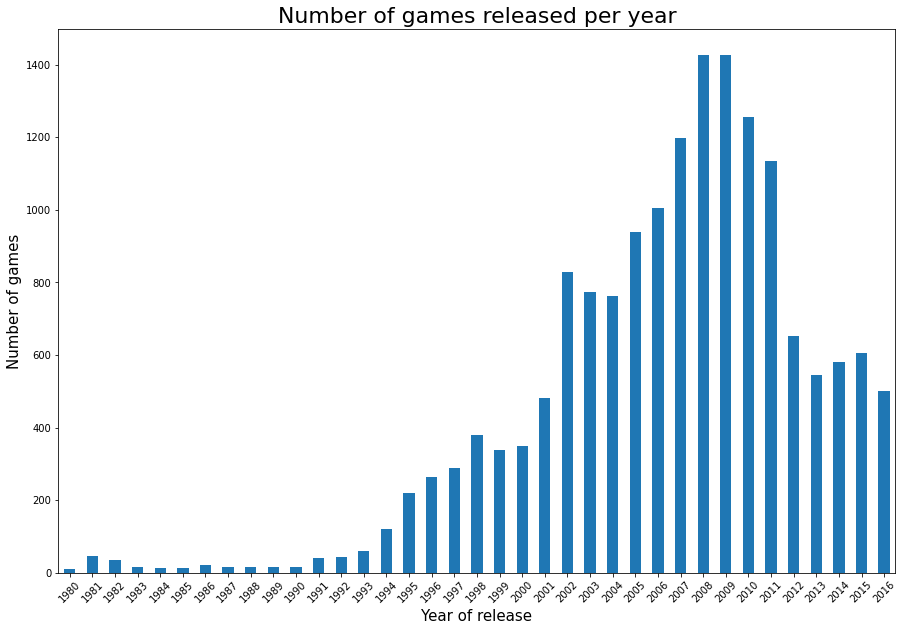

In [32]:
# Obtain the same pivot table as above and plot a bar chart
games.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(kind='bar', figsize=(15,10))

# Add a title, xlabel, ylabel, and then plot
plt.title('Number of games released per year', fontsize=22)
plt.xlabel('Year of release', fontsize=15)
plt.ylabel('Number of games',  fontsize=15)
plt.xticks(rotation=45)
plt.legend().set_visible(False)
plt.show()


Majority of video games were released between 1995 and 2016, with the highest number of video games released between 2007 and 2010. The number of games released each year drastically started to decrease from 1,400 after 2009 until it leveled out in 2014 at around 600 games per year.

Let's look at how the total sales for video games varied by platform platform.

In [30]:
# Create a pivot table showing the total global sales for each platform.
games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)


,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


The platforms with the highest sales are `'PS2'`, `'X360'`, `'PS3'`, `'Wii'`, and `'DS'`. Let's look at the sales distribution for each of these platforms based on sales per year.

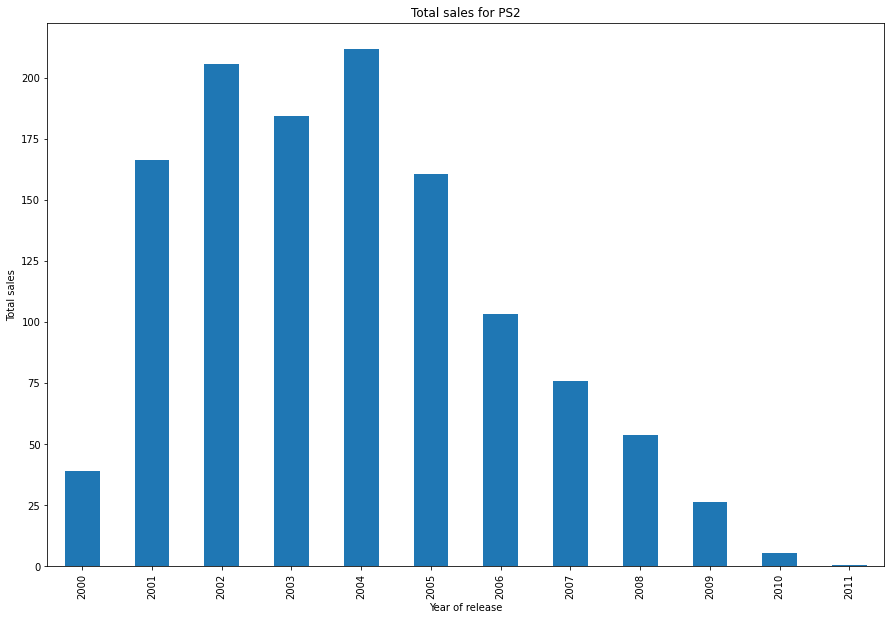

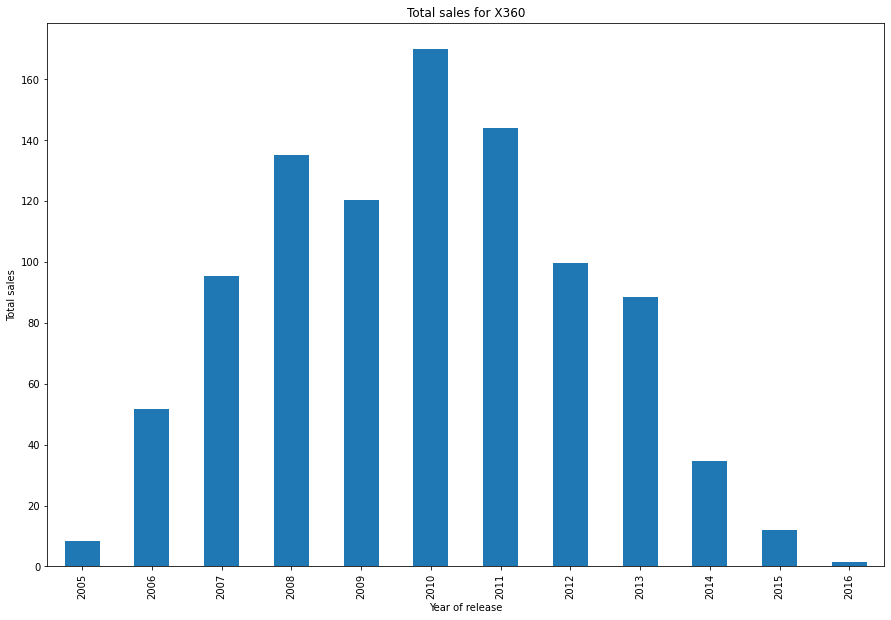

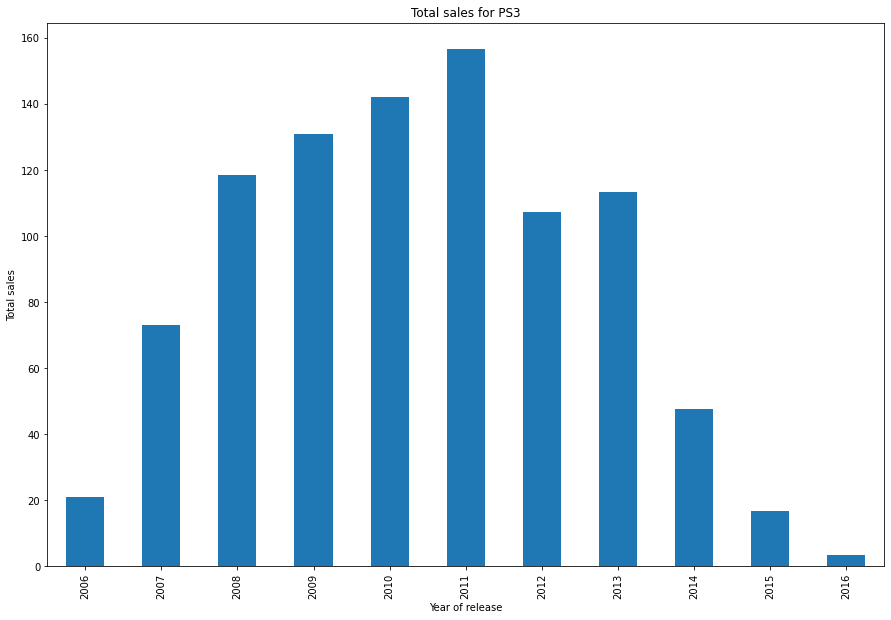

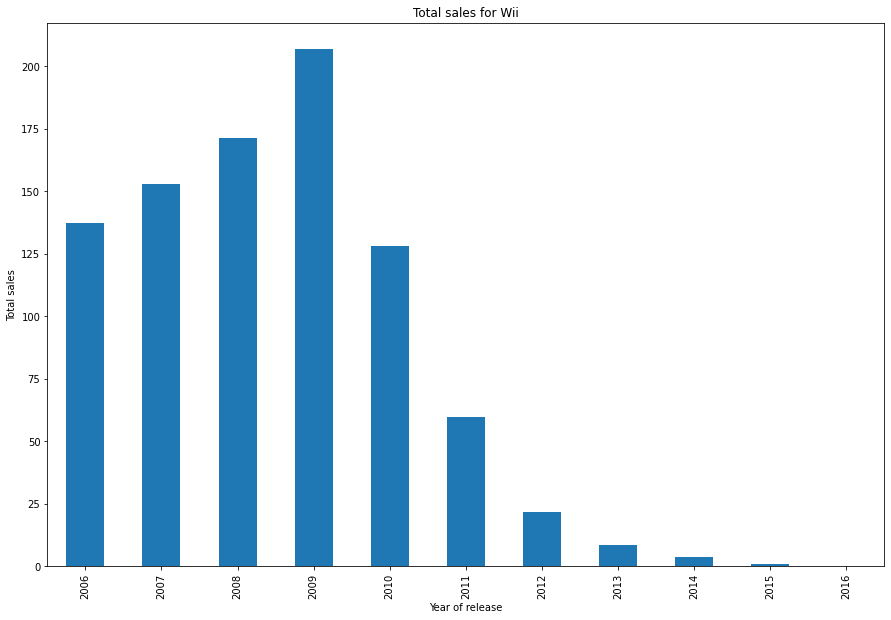

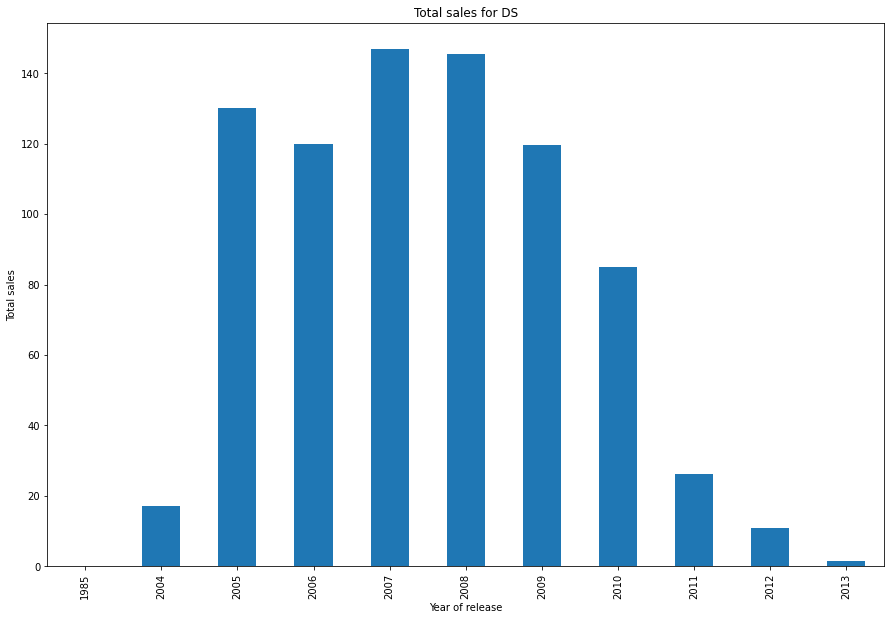

In [31]:
# Store the platforms into a list
platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS']

# Loop each platform name, obtain the data, and plot the total sales by year
for platform in platforms:
    games[games['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(15,10))
    plt.title('Total sales for ' + platform)
    plt.xlabel('Year of release')
    plt.ylabel('Total sales')
    plt.legend().set_visible(False)
    plt.show()

All of the above platforms were at one point very popular, however they have all since faded away to where they have no sales have very few sales each year. From looking at the plots, it appears that it takes roughly 1-3 years for a new platform to really ramp up in popularity, where it stays relevant for 3-4 years, and then begins to fade away over the next 5-6 years. So, the total life span of a platform averages approximately 11 years. Since we just want to know which games will be successful next year, we only need to look at the most recent data. Therefore, the DataFrame will be sliced to only contain rows with data on video games released in the last 3 years.

In [32]:
# Obtaina data slice called 'sample_data' that contains all rows with year of release values between 2014 and 2016
sample_data = games[(games['year_of_release'] >= 2014) & (games['year_of_release'] <= 2016)]


In [33]:
# Group the data slice by platform, and then find the total global sales for each platform
grouped_sample = sample_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(grouped_sample)

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64


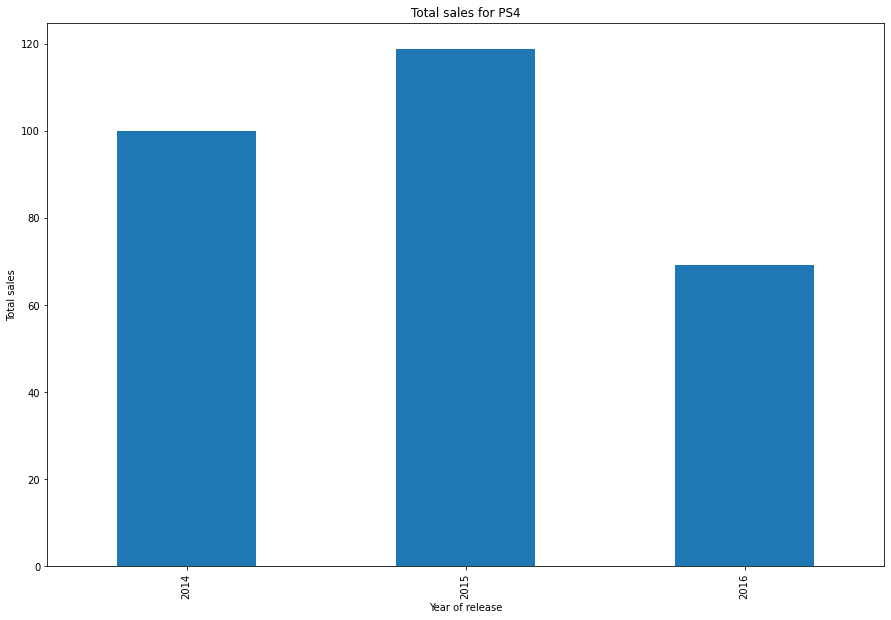

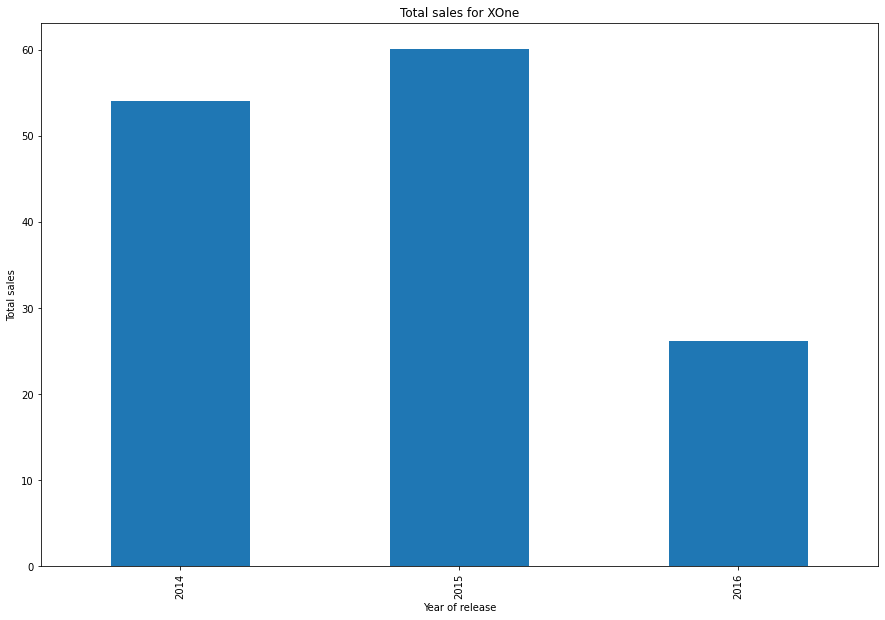

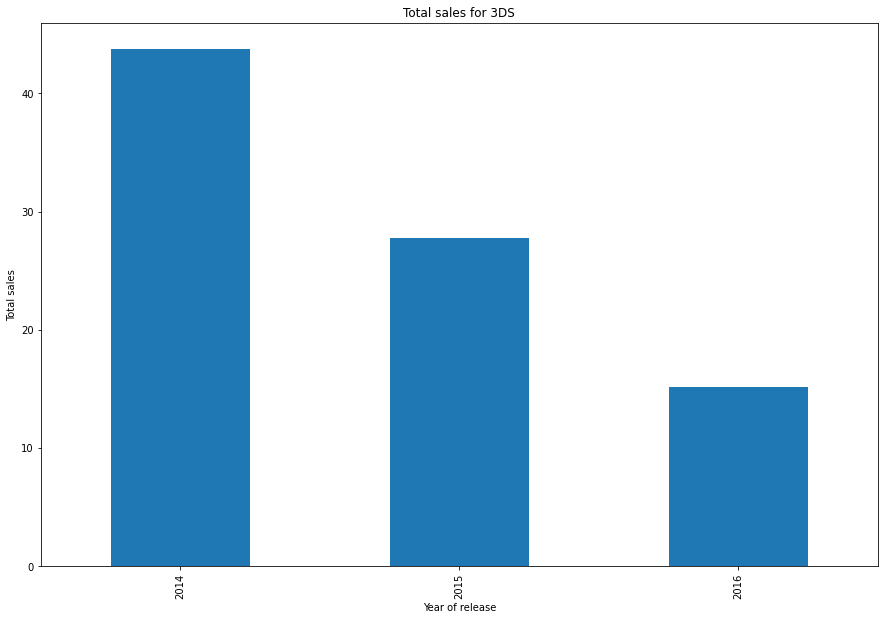

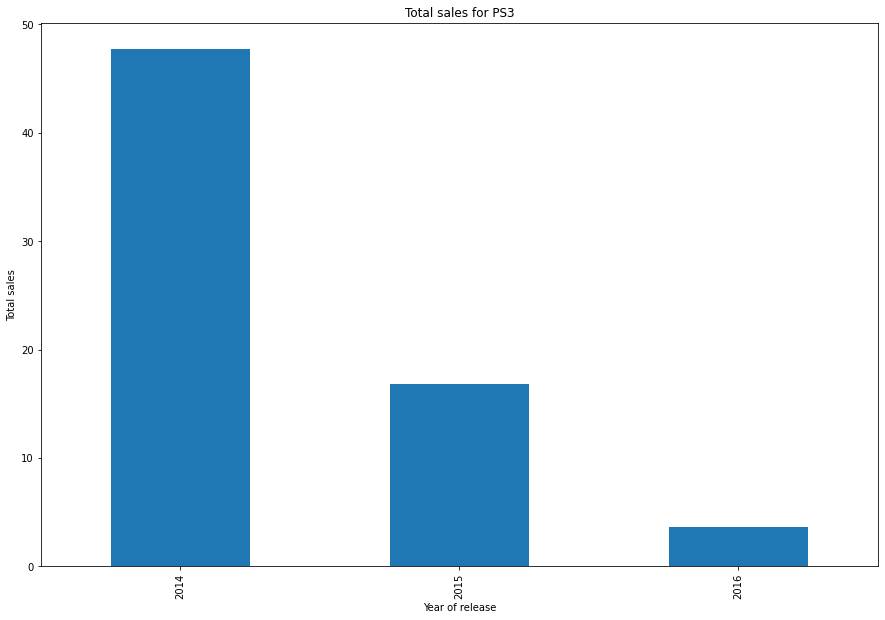

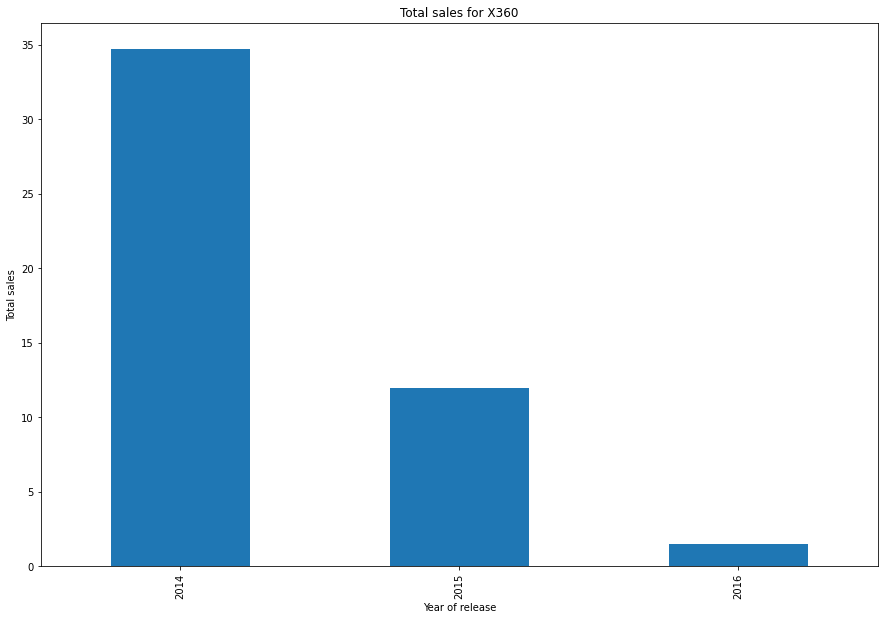

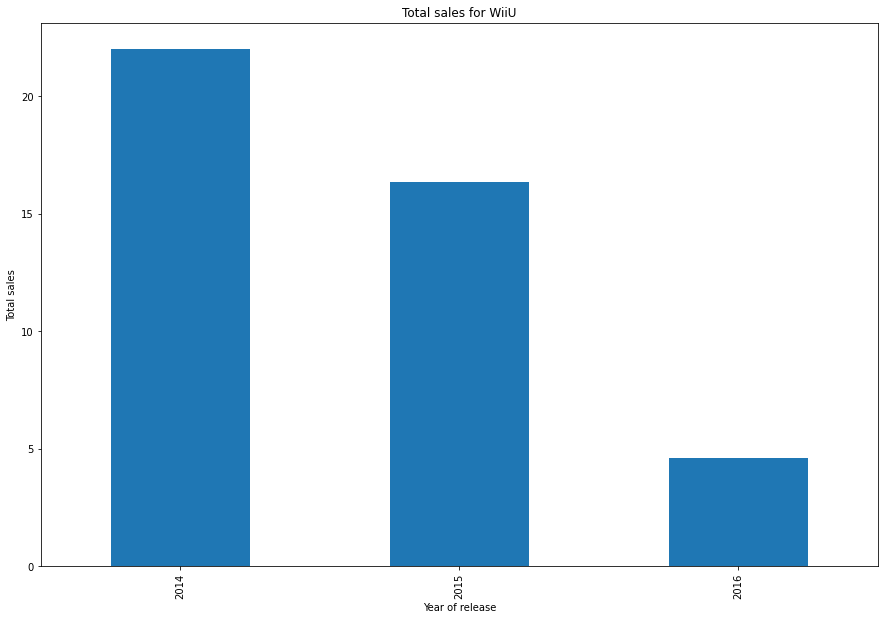

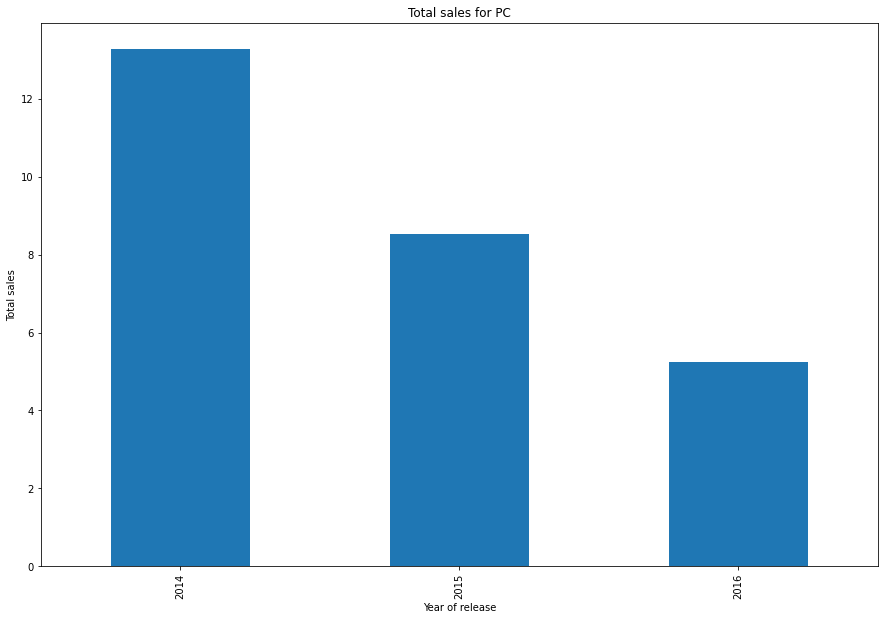

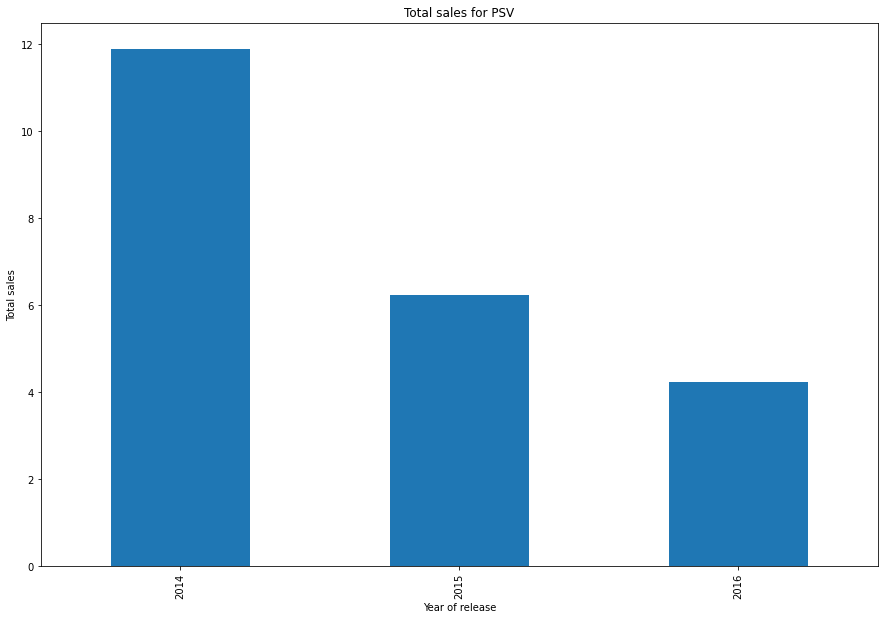

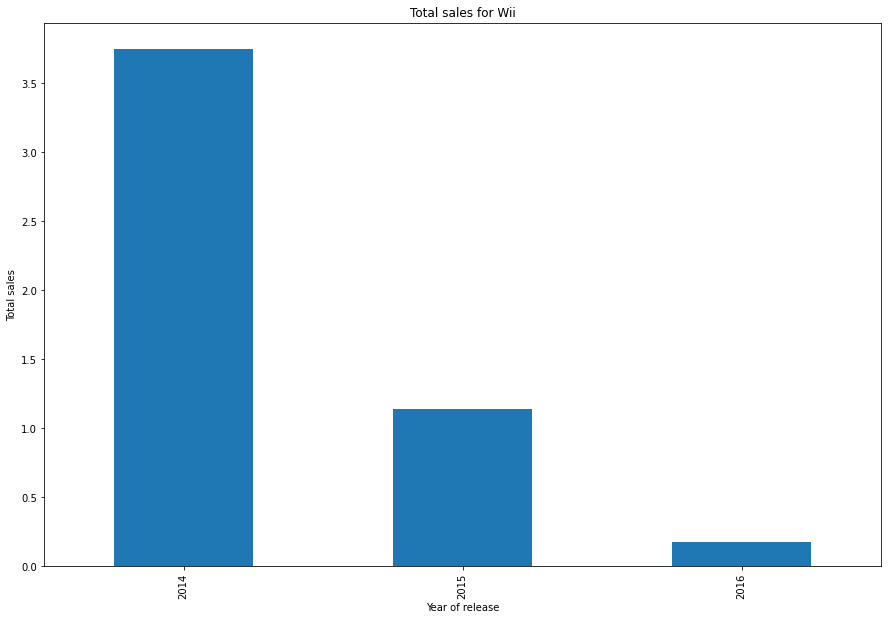

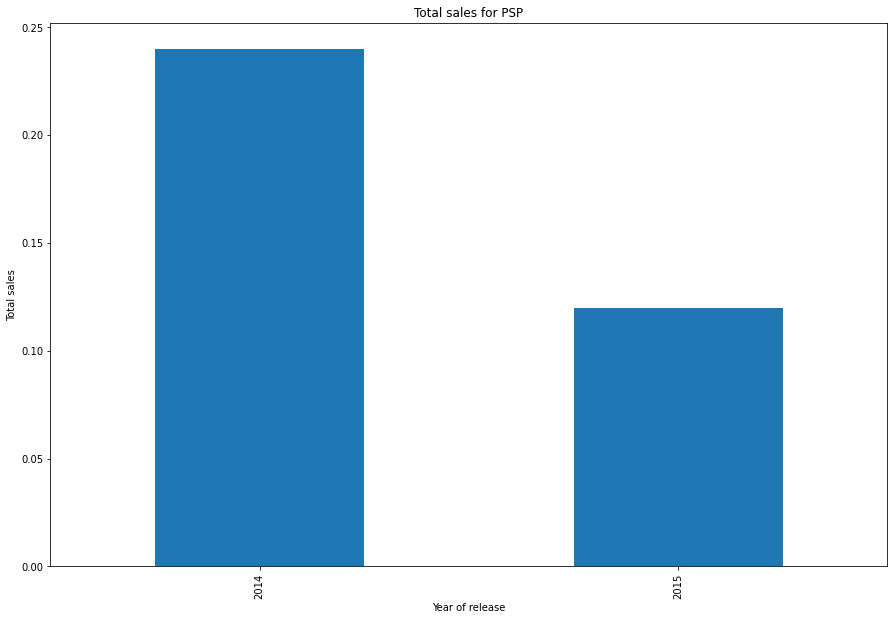

In [34]:
# Obtain the platform names for the 'grouped_sample' data slice
platforms = grouped_sample.index

# Loop each platform name, obtain the data, and plot the total sales by year
for platform in platforms:
    sample_data[sample_data['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(15,10))
    plt.title('Total sales for ' + platform)
    plt.xlabel('Year of release')
    plt.ylabel('Total sales')
    plt.legend().set_visible(False)
    plt.show()

Global video game sales for the 3DS, Xbox 360, WiiU, PC, PSV, and Wii platforms have all been declining over the last 3 years. Video game sales for the PSP platform ended after 2015, so the platform is no longer relevant. The PS4 and Xbox One platforms appear to be leading the way in sales. The plots show a decrease in sales in 2016, however this may simply be because the data is incomplete. So, the platforms with the highest potential for profit are the PS4 and the Xbox One platforms.

<h2>Initialize the data</h2>

As was determined in the previous section, the potentially profitable platforms are the PS4, Xbox One, and PC. We will obtain individual data slices for video game sales pertaining to each platform, and then plot boxplots to visually examine the data's distribution. We will also look at boxplots for the 3DS, WiiU, and PSV platforms.

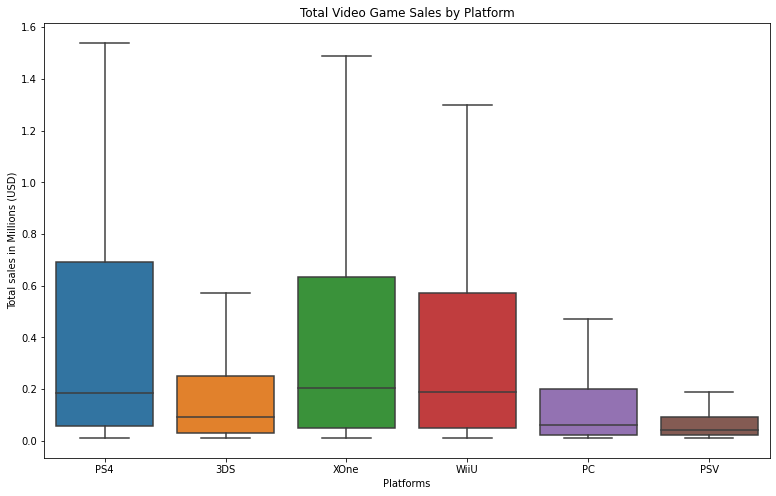

In [35]:
# Query the platforms and plot in a boxplot removing outliers
data = sample_data.query('platform in ["PS4","XOne","PC","3DS","WiiU","PSV"]')
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data, y = 'total_sales', x='platform', showfliers=False)
.set(title = 'Total Video Game Sales by Platform', xlabel = 'Platforms', ylabel = 'Total sales in Millions (USD)'))
plt.show()

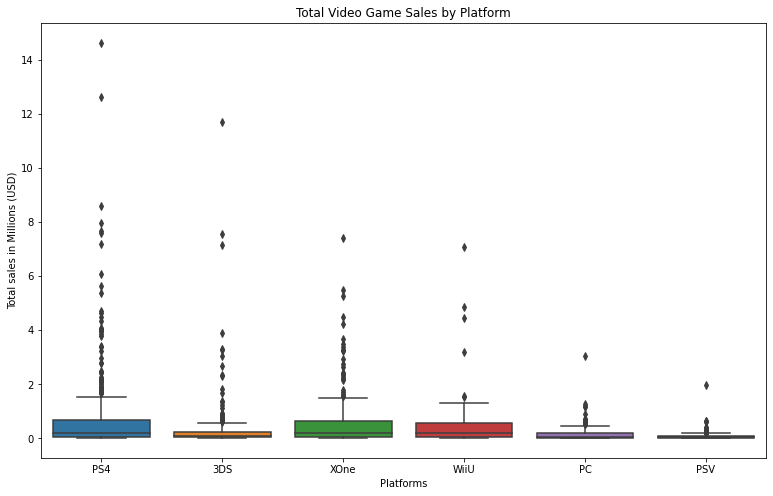

In [36]:
# Query the platforms and plot in a boxplot without removing outliers
data = sample_data.query('platform in ["PS4","XOne","PC","3DS","WiiU","PSV"]')
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data, y = 'total_sales', x='platform')
.set(title = 'Total Video Game Sales by Platform', xlabel = 'Platforms', ylabel = 'Total sales in Millions (USD)'))
plt.show()

Let's also take a look at the average global sales of video games for each platform. We'll compare them to the medians and how each platform differs.

In [37]:
# Creat a list of platforms to look at
platforms = ['PS4','XOne','PC','3DS','WiiU','PSV']

# Calculate and print the average sales for video games of each platform
for platform in platforms:
    average_sales = games.query('platform == @platform')['total_sales'].mean()
    print(f'The average global sales for {platform} is {round(average_sales,2)}')

The average global sales for PS4 is 0.8
The average global sales for XOne is 0.65
The average global sales for PC is 0.27
The average global sales for 3DS is 0.5
The average global sales for WiiU is 0.56
The average global sales for PSV is 0.13


The medians for the PS4, Xbox One, and WiiU platforms all have high median sales that are between approximately 200,000 USD. The PC, 3DS, and PSV platforms have fairly lower median sales. The PC and 3DS platforms have median sales around 100,000 USD, and the PSV platform has the lowest median sales around 50,000 USD. Additionally, the PS4, Xbox One, and WiiU have much larger ranges of values, especially on the higher end, than do the PC, 3DS, and PSV paltforms.

The average global sales for video games of each platform are distinctly higher than their median global sales. Video games of the PS4 platform have median global sales of approximately 200,000 USD, but an average global sales value of approximately 800,000. The average sales is 4 times as great as the median sales. This phenomenon of the mean global sales being significantly higher than the median global sales can be observed for every platform. The reasoning behind this is the large amount of outliers that drag the mean sales value up and away from the median sales value. There are video games for each platform that had sales in the millions, which is significantly higher than the median values of a few thousand dollars. These outlier video games have a huge affect on the mean global sales calculated for video games of each platform.

It can be noted that the sequence of mean global sales for each platform DOES NOT follow the same order as the median global sales for each platform. While the Xbox One has a higher median global sales value than the PS4, the PS4 has a much higher mean global sales value.

It can be concluded that the platforms that bring in the highest global sales are the PS4, Xbox One, and WiiU.

<h2>User and professional reviews</h2>

Let's take a look at how user and critic ratings affect the total sales of a video game. To simply this analysis, let's just look at data for one popular platform, which will be the Xbox One. We have already obtained data on all video games for the Xbox One platform. In the below code blocks, scatter plots will be plotted to compare the the user and critic ratings against the total sales for each video game. Additionally, the correlation coefficient will be calculated for each scatter plot to assist in determining if any relationship exists.

<h3>User score affect on total sales</h3>

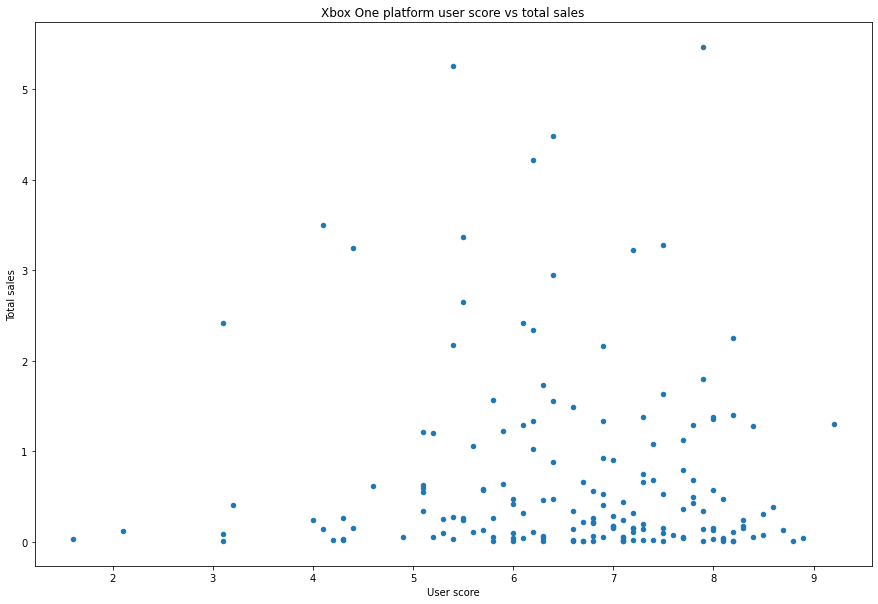

-0.0703839280647581

In [38]:
# xbox one platform user score vs total sales
sample_data.query('platform == "XOne"').plot(x='user_score', y='total_sales', kind='scatter', figsize=(15,10))
plt.title('Xbox One platform user score vs total sales')
plt.xlabel('User score')
plt.ylabel('Total sales')
plt.show()

# calculate the correlation between user_score and total_sales
sample_data.query('platform == "XOne"')['user_score'].corr(games.query('platform == "XOne"')['total_sales'])


There doesn't appear to be any pattern or relationship between user score ratings and the total sales of each video game for the Xbox One platform. This is confirmed with a -0.0704 correlation coefficient, which means that there is a very weak negative relationship between the user ratings and the total sales. This doesn't make much sense in reality, and thus the concept of any relationship between the two values should be discarded altogether.

<h3>Critic scores affect on total sales</h3>

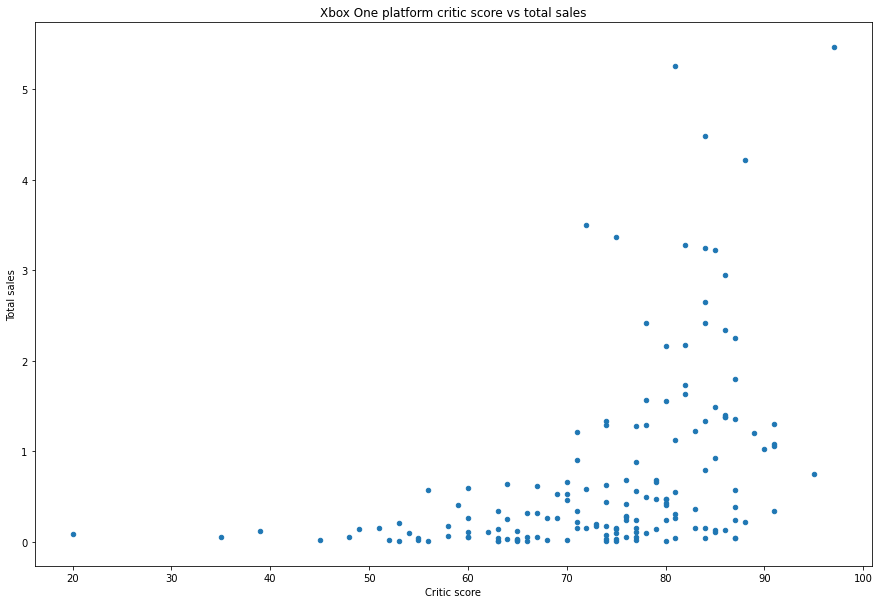

0.42867694370333226

In [39]:
# xbox one platform critic score vs total sales
sample_data.query('platform == "XOne"').plot(x='critic_score', y='total_sales', kind='scatter', figsize=(15,10))
plt.title('Xbox One platform critic score vs total sales')
plt.xlabel('Critic score')
plt.ylabel('Total sales')
plt.show()

# calculate the correlation between critic_score and total_sales
sample_data.query('platform == "XOne"')['critic_score'].corr(games.query('platform == "XOne"')['total_sales'])


There isn't a strong relationship between the critic score and total sales of each video game on the Xbox One platform. Some video games with really high critic scores do have really high total sales, but they're more the exception than the rule. It can be said that video games with a high critic rating have a much better chance of obtaining higher total sales, but it is not a given. This is confirmed by the 0.429 correlation coefficient, which shows that there is a weak relationship between the critic scores and the total sales of each video game.

To confirm our observations above, let's look at data for other popular platforms to see if they have the same relationships. We'll look at data for the PS4 and WiiU platforms.

<h3>PS4 user score affect on total sales</h3>

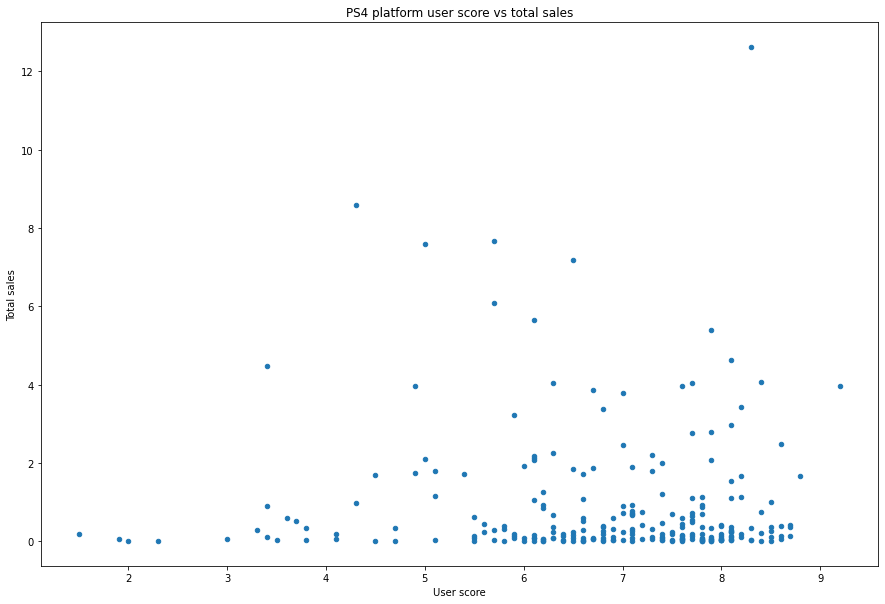

-0.040131589472697356

In [40]:
# ps4 platform user score vs total sales
sample_data.query('platform == "PS4"').plot(x='user_score', y='total_sales', kind='scatter', figsize=(15,10))
plt.title('PS4 platform user score vs total sales')
plt.xlabel('User score')
plt.ylabel('Total sales')
plt.show()


# calculate the correlation between user_score and total_sales
sample_data.query('platform == "PS4"')['user_score'].corr(games.query('platform == "PS4"')['total_sales'])


As was seen with the Xbox One data, there doesn't appear to be any pattern or relationship between the user ratings and the total sales of each video game. This is confirmed with a -0.0401 correlation coefficient, which means there is practially no relationship at all.

<h3>PS4 critic score affect on total sales</h3>

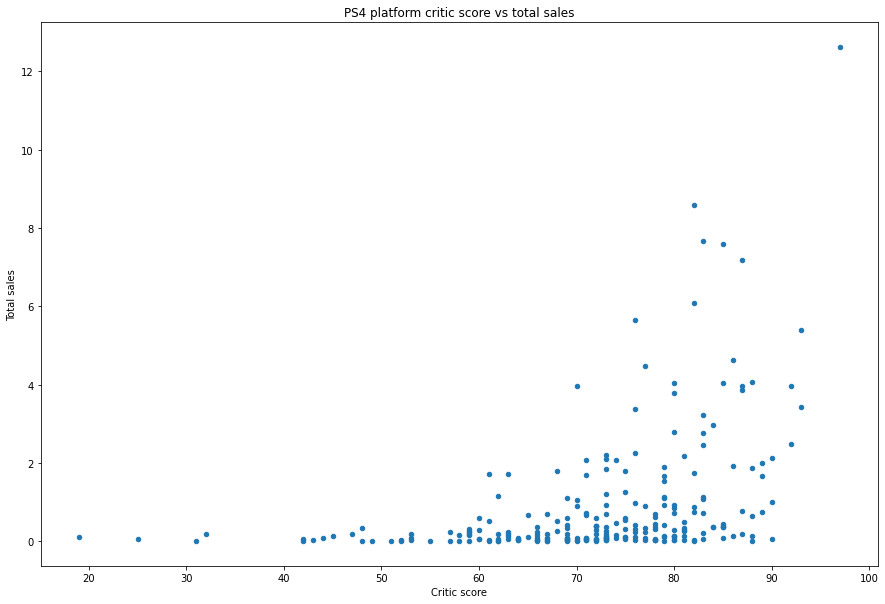

0.40266141068104083

In [41]:
# ps4 platform critic score vs total sales
sample_data.query('platform == "PS4"').plot(x='critic_score', y='total_sales', kind='scatter', figsize=(15,10))
plt.title('PS4 platform critic score vs total sales')
plt.xlabel('Critic score')
plt.ylabel('Total sales')
plt.show()


# calculate the correlation between critic_score and total_sales
sample_data.query('platform == "PS4"')['critic_score'].corr(games.query('platform == "PS4"')['total_sales'])


Similar to what was seen with the Xbox One data, there isn't a strong relationship between the critic score and total sales of each video game. Again, some video games with really high critic scores also have really high total sales, but it is not guaranteed. There are fare more video games with really high critic scores that have the same total sales as video games with much lower critic scores. While a higher critic score generally means there is potential for really high sales, it cannot be stated by a concrete cause-and-effect relationship. This is confirmed by a correlation coefficient of 0.403.

<h3>WiiU user score affect on total sales</h3>

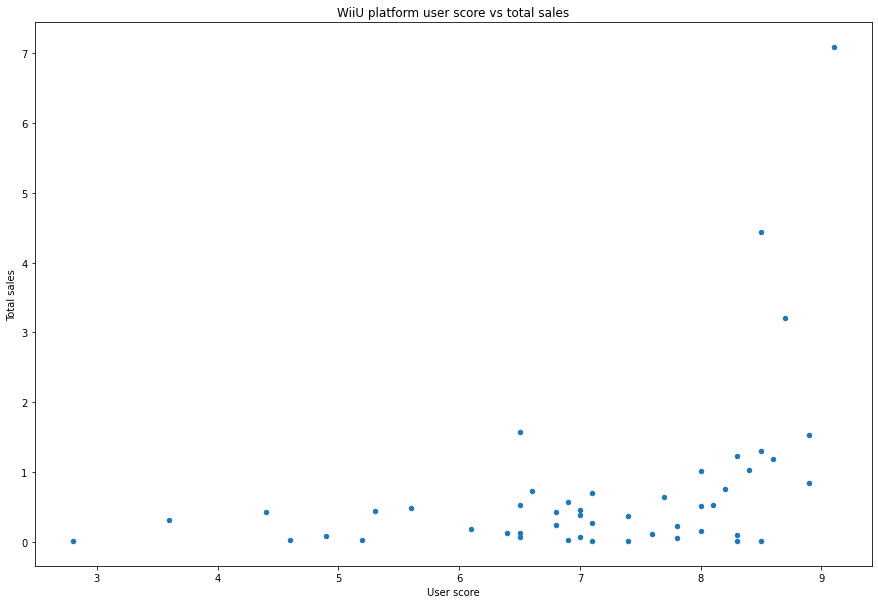

0.40792645792170773

In [42]:
# wiiu platform user score vs total sales
sample_data.query('platform == "WiiU"').plot(x='user_score', y='total_sales', kind='scatter', figsize=(15,10))
plt.title('WiiU platform user score vs total sales')
plt.xlabel('User score')
plt.ylabel('Total sales')
plt.show()


# calculate the correlation between user_score and total_sales
sample_data.query('platform == "WiiU"')['user_score'].corr(games.query('platform == "WiiU"')['total_sales'])


For the WiiU paltform, there is a much stronger correlation between user ratings and global sales than was previously seen with the Xbox One and PS4 paltforms. The correlation coefficient was calculated to be approximiately 0.408, which means that there is a correlation between the user ratings and global sales for video games of the WiiU platform, though not very strong. It can be concluded that higher user ratings for WiiU video games generally means that the global sales will be higher, but this is not always the case.

<h3> WiiU critic score affect on total sales </h3>

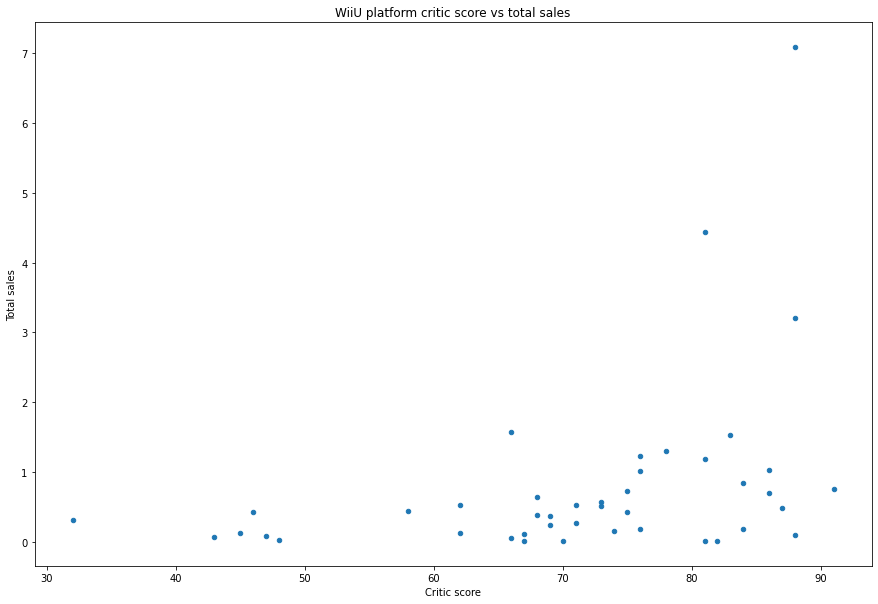

0.370201412480884

In [43]:
# wiiu platform critic score vs total sales
sample_data.query('platform == "WiiU"').plot(x='critic_score', y='total_sales', kind='scatter', figsize=(15,10))
plt.title('WiiU platform critic score vs total sales')
plt.xlabel('Critic score')
plt.ylabel('Total sales')
plt.show()


# calculate the correlation between critic_score and total_sales
sample_data.query('platform == "WiiU"')['critic_score'].corr(games.query('platform == "WiiU"')['total_sales'])


As was seen with data from the Xbox One and PS4 platforms, there is not a strong relationship between critic ratings and the total sales of video games on the WiiU platform. A high critic rating means a video game has the potential for very high total sales, but as was observed earlier, high sales are not guaranteed. There are many more video games with high critic ratings and low total sales than there are high critic scores and high total sales. This observation is confirmed once again by a correlation coefficient of 0.370.

<h2>Distribution of games by genre</h2>

Now let's take a look at how video games are distributed amongst genres. In this section, we will plot two bar charts. One will display how many video games are in each genre category, and the other will show the median total global sales for video games of each genre category. By comparing both charts, we'll be able to make observations about profitable genres and what that may mean for future video games.

<h3>Plotting total video games by genre</h3>

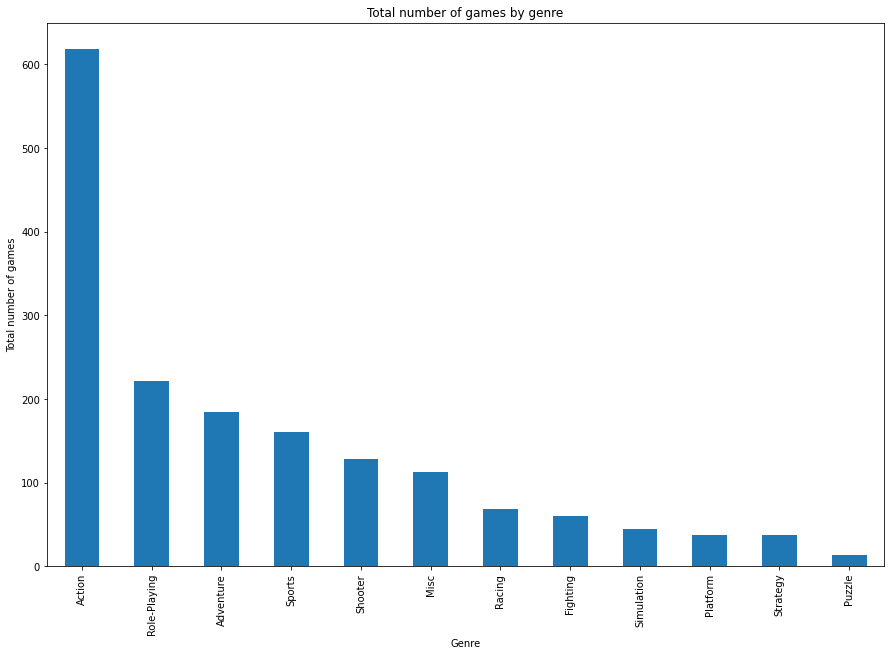

In [44]:
# plot the total number of games by genre
sample_data.groupby('genre')['name'].count().sort_values(ascending=False).plot(kind='bar', figsize=(15,10))
plt.title('Total number of games by genre')
plt.xlabel('Genre')
plt.ylabel('Total number of games')
plt.show()


<h3>Plotting median total sales by genre</h3>

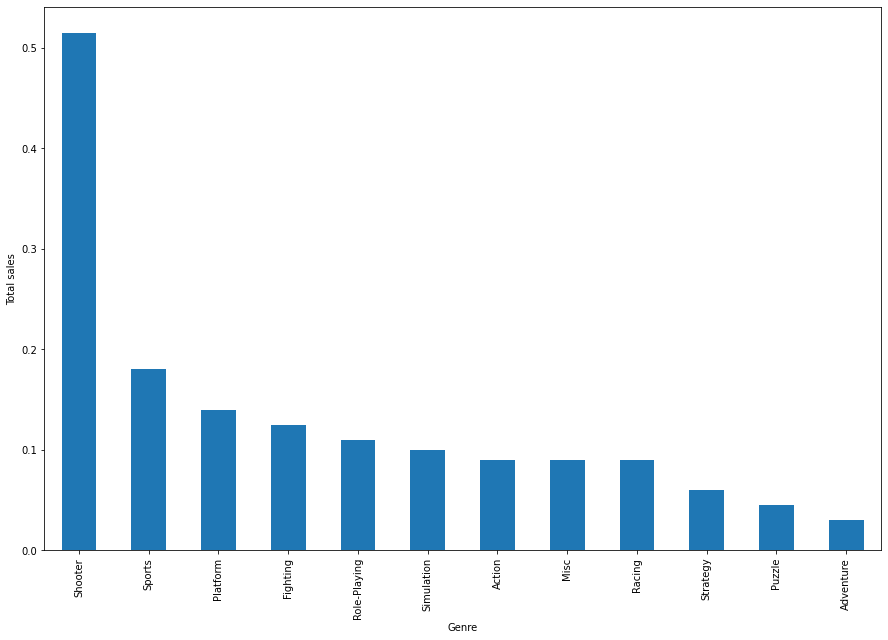

In [45]:
# plot the total sales by genre
sample_data.groupby('genre')['total_sales'].median().sort_values(ascending=False).plot(kind='bar', figsize=(15,10))
plt.xlabel('Genre')
plt.ylabel('Total sales')
plt.show()


<h3> Observations </h3>

While the most video games belong to the Action genre, the median sales for video games of that genre is on the lower end at approximately 110,000 USD. Additionally, the Adventure genre has a very large share of video games, but is reponsible for the least median total sales by video game in any other genre. On the other hand, there are much fewer video games in the Shooter genre, however that genre has the heighest median global sales out of any other video game genre.

Overall, we cannot make any conclusions about how profitable genres are based on how many video games are in those genres. However, it is easy to see that genres like Strategy and Puzzle have very small shares of video games and have some of the lowest video game sales.

In [46]:
# calculate the correlation between median global sales and how many games are in each genre
sample_data.groupby('genre')['total_sales'].median().corr(games.groupby('genre')['name'].count())

0.062057865600651525

The above correlation coefficient value of approximately 0.062 confirms the observation that there is no relationship between how many video games are in a genre and how profitable the genre is. There is no sense in Ice focusing on selling more populated genres, as there is no correlation to higher global sales.

<h2>Looking at Popular Video Game Attributes for Each Region</h2>

We now want to get an idea of which kind of platforms, video game genres, and ESRB ratings are most popular (have the highest sales) in each of the three regions (NA, EU, JP).

<h3>Top Five Platforms (sales)</h3>

Let's look at the most popular platforms for each of the 3 regions. We will measure each platform's popularity by measuring how high the sales are in each region. In the below code cells, a data slice will be stored that contains the platforms each game is on, and the corresponding regional sales. Then, the data slice will be grouped by the platform names, the regional sales for each platorm will be summed, and the resulting table will be sorted by each region in descending order. To make it easier for the sorted column to be brought to the attention of the reader, the column that the data is sorted by will be highlighted.

Additionally, to visualize the data, a pie chart will be displayed of the most popular platforms in each region. The total regional sales will be plotted for the five or six most popular platforms, and then the remaining platforms will be grouped together under the category "Other". This will give a representation of the most popular platforms in each region, and how their market shares compare.

<h3> NA sales</h3>

In [47]:
# Group the data by platform, sum the regional sales, and sort by 'na_sales' in descending order
grouped_sample = sample_data.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum().sort_values(by='na_sales', ascending=False)[0:5]
grouped_sample

,na_sales,eu_sales,jp_sales
platform,,,
PS4,98.61,130.04,15.02
XOne,81.27,46.25,0.32
X360,28.30,15.49,0.08
3DS,22.64,16.12,44.24
PS3,22.05,25.54,11.22


/tmp/ipykernel_67/119188626.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_platform = sample_data.loc[:,['platform', 'na_sales', 'eu_sales', 'jp_sales']]\


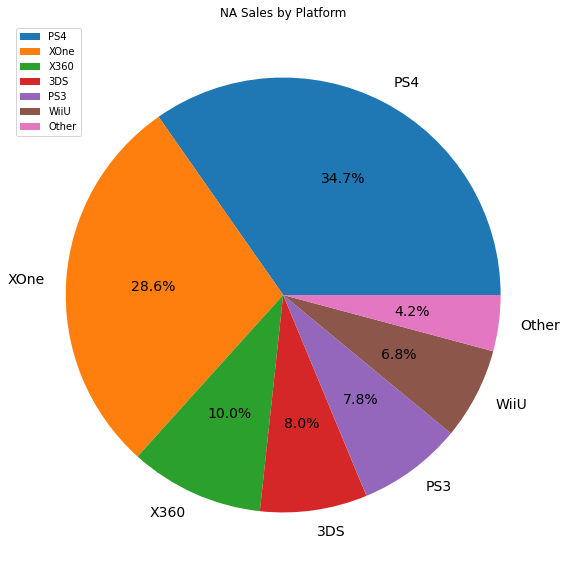

In [48]:
# Obtain the data slice containing the platforms and regional sales info, group data by platform, sum the regional
# sales
df_platform = sample_data.loc[:,['platform', 'na_sales', 'eu_sales', 'jp_sales']]\
.groupby('platform')['na_sales', 'eu_sales', 'jp_sales'].sum()

# Obtain the platforms that will be plotted
plotted_platforms = df_platform['na_sales'].sort_values(ascending=False)[:6]

# Obtain the platforms that will be plotted as "Other"
other_platforms = df_platform['na_sales'].sort_values(ascending=False)[6:].sum()

# Add the Other value to the plotted_platforms Series
plotted_platforms.loc['Other'] = other_platforms

# Plot the data in a pie chart. Provide percentages.
plotted_platforms.plot(kind='pie', autopct='%1.1f%%', fontsize=14, figsize=(10,10), title='NA Sales by Platform')
plt.legend(loc='upper left')
plt.ylabel('')
plt.show()


<h3>EU Sales</h3>

In [49]:
# Group the data by platform, sum the regional sales, and sort by 'eu_sales' in descending order
grouped_sample = sample_data.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum().sort_values(by='eu_sales', ascending=False)[0:5]
grouped_sample


,na_sales,eu_sales,jp_sales
platform,,,
PS4,98.61,130.04,15.02
XOne,81.27,46.25,0.32
PS3,22.05,25.54,11.22
PC,7.23,17.97,0.00
3DS,22.64,16.12,44.24


/tmp/ipykernel_67/1307215950.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_platform = sample_data.loc[:,['platform', 'na_sales', 'eu_sales', 'jp_sales']]\


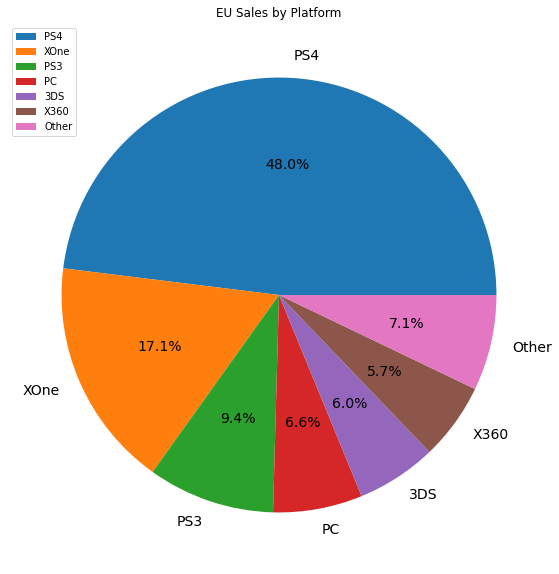

In [50]:
# Obtain the data slice containing the platforms and regional sales info, group data by platform, sum the regional
# sales
df_platform = sample_data.loc[:,['platform', 'na_sales', 'eu_sales', 'jp_sales']]\
.groupby('platform')['na_sales', 'eu_sales', 'jp_sales'].sum()

# Obtain the platforms that will be plotted
plotted_platforms = df_platform['eu_sales'].sort_values(ascending=False)[:6]

# Obtain the platforms that will be plotted as "Other"
other_platforms = df_platform['eu_sales'].sort_values(ascending=False)[6:].sum()

# Add the Other value to the plotted_platforms Series
plotted_platforms.loc['Other'] = other_platforms

# Plot the data in a pie chart. Provide percentages.
plotted_platforms.plot(kind='pie', autopct='%1.1f%%', fontsize=14, figsize=(10,10), title='EU Sales by Platform')
plt.legend(loc='upper left')
plt.ylabel('')
plt.show()


<h3>JP Sales</h3>

In [51]:
# Group the data by platform, sum the regional sales, and sort by 'jp_sales' in descending order
grouped_sample = sample_data.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum().sort_values(by='jp_sales', ascending=False)[0:5]
grouped_sample


,na_sales,eu_sales,jp_sales
platform,,,
3DS,22.64,16.12,44.24
PS4,98.61,130.04,15.02
PSV,2.52,3.53,14.54
PS3,22.05,25.54,11.22
WiiU,19.36,13.15,7.31


/tmp/ipykernel_67/3271184870.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_platform = sample_data.loc[:,['platform', 'na_sales', 'eu_sales', 'jp_sales']]\


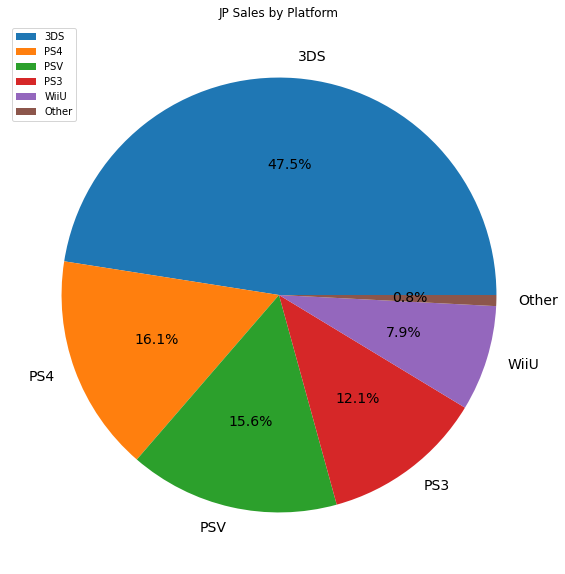

In [52]:
# Obtain the data slice containing the platforms and regional sales info, group data by platform, sum the regional
# sales
df_platform = sample_data.loc[:,['platform', 'na_sales', 'eu_sales', 'jp_sales']]\
.groupby('platform')['na_sales', 'eu_sales', 'jp_sales'].sum()

# Obtain the platforms that will be plotted
plotted_platforms = df_platform['jp_sales'].sort_values(ascending=False)[:5]

# Obtain the platforms that will be plotted as "Other"
other_platforms = df_platform['jp_sales'].sort_values(ascending=False)[5:].sum()

# Add the Other value to the plotted_platforms Series
plotted_platforms.loc['Other'] = other_platforms

# Plot the data in a pie chart. Provide percentages.
plotted_platforms.plot(kind='pie', autopct='%1.1f%%', fontsize=14, figsize=(10,10), title='JP Sales by Platform')
plt.legend(loc='upper left')
plt.ylabel('')
plt.show()

<h3>Observations</h3>

PS4

- The PS4 platform is very popular in all 3 regions. The highest sales of video games in both the NA and EU regions are for the PS4 platform. In the JP region, PS4 platform comes second only to the 3DS platform. The share of sales for the PS4 platform is always greater than a third of the sales, and is often closer to half the sales.

Xbox One

- The Xbox One is popular in both the NA and EU regions. It is responsible for the second highest sales of video games in both regions, with the PS4 taking the highest sales. The Xbox One does not break into the top 5 highest sales in the JP region.

Xbox 360

- The Xbox 360 platform is responsible for the third highest sales of video games in the NA region, however it does not break the top 5 sales in either the EU or JP region.

PS3

- The PS3 platform breaks the top 5 in all 3 regions. However, it is only responsible 5th, 3rd, and 4th highest sales in the NA, EU, and JP regions, respectively. It appears that the PS3 is on its way out.

3DS

- The 3DS is the most popular platform in the JP region, as it is responsible for the highest total sales in the region. The share of video games sales brought in by the 3DS platform is nearly 50% in the JP region, but only around 6% - 8% in the NA and EU regions.

PC

- The PC platform is still responsible for nearly 7% of video game sales in the EU region over the past 3 years. However it does not contribute to the top 5 sales in either of the NA or JP regions.

PSV and WiiU

- Both the PSV and WiiU are responsible for the 3rd and 5th highest video game sales in the JP region, respectively. But, neither platform is respnsible for high video game sales in either of the NA or EU regions.

After reviewing the above observations, the general conclusion I have is that new video games should be created to be compatible with the PS4 and Xbox One platforms in either the NA or EU regions. Whereas, if the target audience is in the JP region, then the video game should be created to be compatible with 3DS and PS4 platforms.

<h2>Top Five genres (sales)</h2>

Let's look at the which genres have the heighest sales in each region.

<h3>NA Sales</h3>

In [53]:
# Group the data by genre, sum the regional sales, and sort by 'na_sales' in descending order
grouped_sample = sample_data.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum().sort_values(by='na_sales', ascending=False)[0:5]
grouped_sample


,na_sales,eu_sales,jp_sales
genre,,,
Shooter,79.02,65.52,4.87
Action,72.53,74.68,29.58
Sports,46.13,45.73,3.26
Role-Playing,33.47,28.17,31.16
Misc,15.05,12.86,5.61


/tmp/ipykernel_67/2349031876.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_genre = sample_data.loc[:,['genre', 'na_sales', 'eu_sales', 'jp_sales']]\


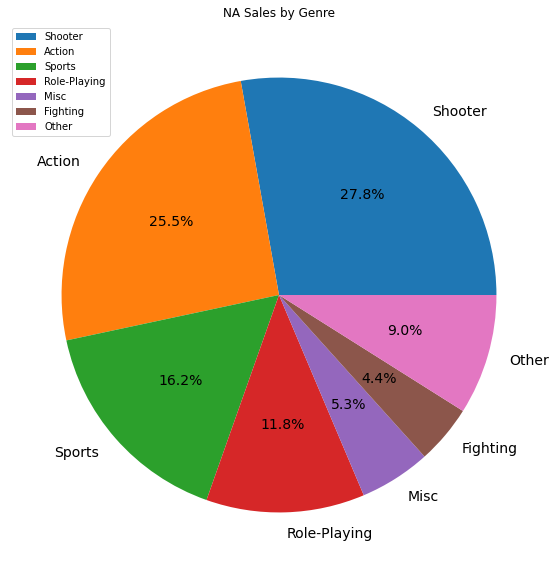

In [54]:
# Obtain the data slice containing the genre and regional sales info, group data by genre, sum the regional
# sales
df_genre = sample_data.loc[:,['genre', 'na_sales', 'eu_sales', 'jp_sales']]\
.groupby('genre')['na_sales', 'eu_sales', 'jp_sales'].sum()

# Obtain the genres that will be plotted
plotted_genres = df_genre['na_sales'].sort_values(ascending=False)[:6]

# Obtain the genres that will be plotted as "Other"
other_genres = df_genre['na_sales'].sort_values(ascending=False)[6:].sum()

# Add the Other value to the plotted_genres Series
plotted_genres.loc['Other'] = other_genres

# Plot the data in a pie chart. Provide percentages.
plotted_genres.plot(kind='pie', autopct='%1.1f%%', fontsize=14, figsize=(10,10), title='NA Sales by Genre')
plt.legend(loc='upper left')
plt.ylabel('')
plt.show()


<h3>EU Sales</h3>

In [55]:
# Group the data by genre, sum the regional sales, and sort by 'eu_sales' in descending order
grouped_sample = sample_data.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum().sort_values(by='eu_sales', ascending=False)[0:5]
grouped_sample


,na_sales,eu_sales,jp_sales
genre,,,
Action,72.53,74.68,29.58
Shooter,79.02,65.52,4.87
Sports,46.13,45.73,3.26
Role-Playing,33.47,28.17,31.16
Racing,8.74,14.13,1.76


/tmp/ipykernel_67/2972644693.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_genre = sample_data.loc[:,['genre', 'na_sales', 'eu_sales', 'jp_sales']]\


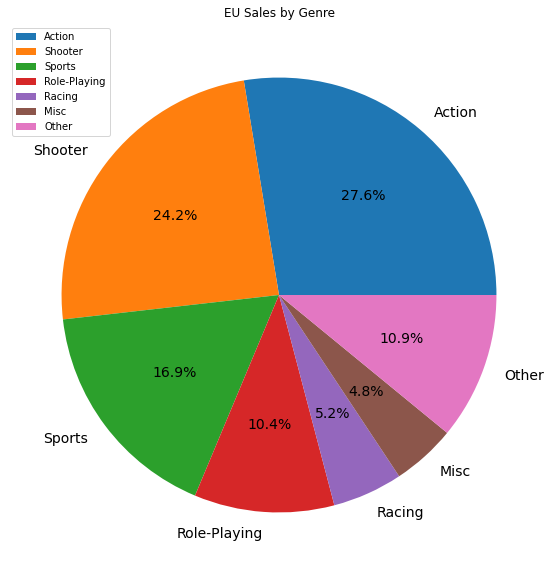

In [56]:

# Obtain the data slice containing the genre and regional sales info, group data by genre, sum the regional
# sales
df_genre = sample_data.loc[:,['genre', 'na_sales', 'eu_sales', 'jp_sales']]\
.groupby('genre')['na_sales', 'eu_sales', 'jp_sales'].sum()

# Obtain the genres that will be plotted
plotted_genres = df_genre['eu_sales'].sort_values(ascending=False)[:6]

# Obtain the genres that will be plotted as "Other"
other_genres = df_genre['eu_sales'].sort_values(ascending=False)[6:].sum()

# Add the Other value to the plotted_genres Series
plotted_genres.loc['Other'] = other_genres

# Plot the data in a pie chart. Provide percentages.
plotted_genres.plot(kind='pie', autopct='%1.1f%%', fontsize=14, figsize=(10,10), title='EU Sales by Genre')
plt.legend(loc='upper left')
plt.ylabel('')
plt.show()


<h3>JP Sales</h3>

In [57]:
# Group the data by genre, sum the regional sales, and sort by 'jp_sales' in descending order
grouped_sample = sample_data.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum().sort_values(by='jp_sales', ascending=False)[0:5]
grouped_sample


,na_sales,eu_sales,jp_sales
genre,,,
Role-Playing,33.47,28.17,31.16
Action,72.53,74.68,29.58
Fighting,12.43,6.69,6.37
Misc,15.05,12.86,5.61
Shooter,79.02,65.52,4.87


/tmp/ipykernel_67/171060874.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_genre = sample_data.loc[:,['genre', 'na_sales', 'eu_sales', 'jp_sales']]\


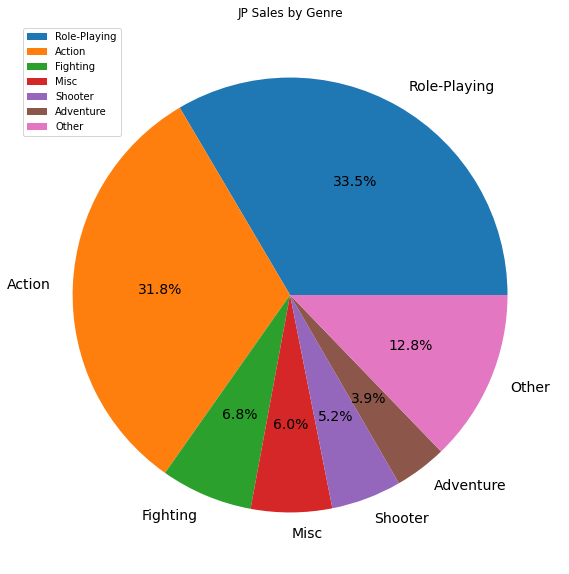

In [58]:
# Obtain the data slice containing the genre and regional sales info, group data by genre, sum the regional
# sales
df_genre = sample_data.loc[:,['genre', 'na_sales', 'eu_sales', 'jp_sales']]\
.groupby('genre')['na_sales', 'eu_sales', 'jp_sales'].sum()

# Obtain the genres that will be plotted
plotted_genres = df_genre['jp_sales'].sort_values(ascending=False)[:6]

# Obtain the genres that will be plotted as "Other"
other_genres = df_genre['jp_sales'].sort_values(ascending=False)[6:].sum()

# Add the Other value to the plotted_genres Series
plotted_genres.loc['Other'] = other_genres

# Plot the data in a pie chart. Provide percentages. 
plotted_genres.plot(kind='pie', autopct='%1.1f%%', fontsize=14, figsize=(10,10), title='JP Sales by Genre')
plt.legend(loc='upper left')
plt.ylabel('')
plt.show()


<h3>Observation</h3>

Aciton

- The Action genre always has the heighest or 2nd heighest regional sales in any of the 3 regions, and is responsible for nearly 30% of the total video game sales in the 3 regions.

Shooter

- The Shooter genre acconts for approxiimately a quarter of the total video game sales in the NA and EU regions, but is only responsible for approximately 5% of total video game sales in the JP region.

Sports

- The Sports genre is responsible for approximately 16% - 17% of total video game sales in either the NA or EU regions, but does not contribute to the 5 highest video game sales by platform in the JP region.

Role-Playing

- Surprisingly, the genre with the heighest sales in the JP region is Role-Playing video games, which is responsible for approximately a third of all video game sales. However the Role-Playing genre is not as popular in either of the NA or EU regions, seeing as it is only responsible for approximately 11% of total video game sales over the past 3 years.

Platform

- The Platform genre breaks into the top 5 heighest regional sales in both the NA and JP regions, but does not break the top 5 heighest regional sales in the EU region.

Racing

- Racing is responsible for 5% of total video game sales in the EU region over the past 3 years, but does not appear to be nearly as popular in either the NA or JP regions.

Miscellaneous

- The Miscellaneous genre accounts for %5 - 6% of video game sales in all 3 regions.

Fighting

- Lastly, the Fighting genre is responsible for approximately 7% of video game sales in the JP region, 4% of video game sales in the NA region, and only 2.5% of sales (not shown) in the EU region over the past 3 years.

After review of the above observations, new video games should be created in the Action genre to pursue audiences in all 3 regions. If the audience is just in the JP region, the the Role-Playing genre should be pursued in addition to Action genre. The Action genre is also semi-popular in both the NA and EU regions. If the target audience is just in the NA and EU regions, the the Shooter and Sports genres can be added to the Action genre in place of the Role-Playing genre for the JP region.

<h2>Top ESRB Ratings</h2>

Let's determine if the ESRB ratings for video games have any affect on the regional sales.

<h3>NA Sales</h3>

In [59]:
# Group the data by ESRB rating, sum the regional sales, and sort by 'na_sales' in descending order
grouped_sample = sample_data.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum().sort_values(by='na_sales', ascending=False)[0:5]
grouped_sample



,na_sales,eu_sales,jp_sales
rating,,,
M,96.42,93.44,8.01
unknown,64.72,58.95,56.90
E,50.74,58.06,8.94
T,38.95,34.07,14.78
E10+,33.23,26.16,4.46


/tmp/ipykernel_67/934700764.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_rating = sample_data.loc[:,['rating', 'na_sales', 'eu_sales', 'jp_sales']]\


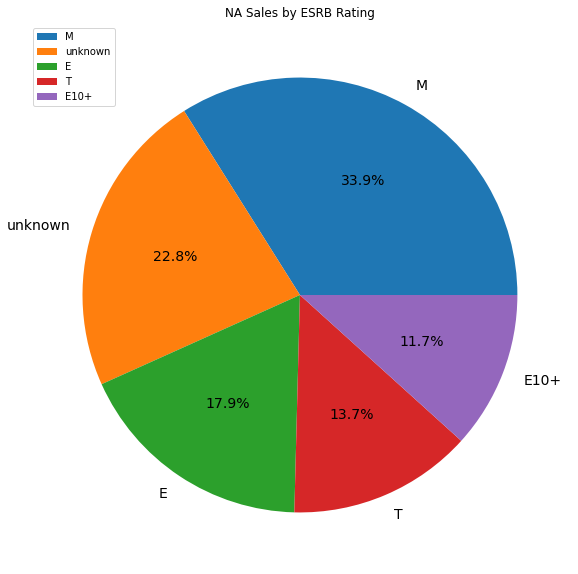

In [60]:
# Obtain the data slice containing the ESRB Rating and regional sales info, group data by ESRB Rating, sum the regional
# sales
df_rating = sample_data.loc[:,['rating', 'na_sales', 'eu_sales', 'jp_sales']]\
.groupby('rating')['na_sales', 'eu_sales', 'jp_sales'].sum()

# Obtain the ESRB Rating that will be plotted
plotted_ratings = df_rating['na_sales'].sort_values(ascending=False)[:]

# Plot the data in a pie chart. Provide percentages.
plotted_ratings.plot(kind='pie', autopct='%1.1f%%', fontsize=14, figsize=(10,10), title='NA Sales by ESRB Rating')
plt.legend(loc='upper left')
plt.ylabel('')
plt.show()


<h3>EU Sales</h3>

In [61]:
# Group the data by ESRB rating, sum the regional sales, and sort by 'eu_sales' in descending order
grouped_sample = sample_data.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum().sort_values(by='eu_sales', ascending=False)[0:5]
grouped_sample


,na_sales,eu_sales,jp_sales
rating,,,
M,96.42,93.44,8.01
unknown,64.72,58.95,56.90
E,50.74,58.06,8.94
T,38.95,34.07,14.78
E10+,33.23,26.16,4.46


/tmp/ipykernel_67/2838358357.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_rating = sample_data.loc[:,['rating', 'na_sales', 'eu_sales', 'jp_sales']]\


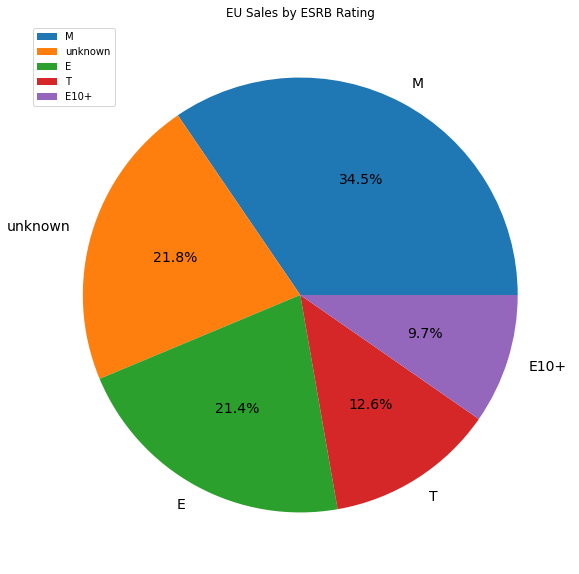

In [62]:

# Obtain the data slice containing the ESRB Rating and regional sales info, group data by ESRB Rating, sum the regional
# sales
df_rating = sample_data.loc[:,['rating', 'na_sales', 'eu_sales', 'jp_sales']]\
.groupby('rating')['na_sales', 'eu_sales', 'jp_sales'].sum()

# Obtain the ESRB Rating that will be plotted
plotted_ratings = df_rating['eu_sales'].sort_values(ascending=False)[:]

# Plot the data in a pie chart. Provide percentages.
plotted_ratings.plot(kind='pie', autopct='%1.1f%%', fontsize=14, figsize=(10,10), title='EU Sales by ESRB Rating')
plt.legend(loc='upper left')
plt.ylabel('')
plt.show()


<h3>JP Sales</h3>

In [63]:
# Group the data by ESRB rating, sum the regional sales, and sort by 'jp_sales' in descending order
grouped_sample = sample_data.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum().sort_values(by='jp_sales', ascending=False)[0:5]
grouped_sample


,na_sales,eu_sales,jp_sales
rating,,,
unknown,64.72,58.95,56.90
T,38.95,34.07,14.78
E,50.74,58.06,8.94
M,96.42,93.44,8.01
E10+,33.23,26.16,4.46


/tmp/ipykernel_67/540882483.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_rating = sample_data.loc[:,['rating', 'na_sales', 'eu_sales', 'jp_sales']]\


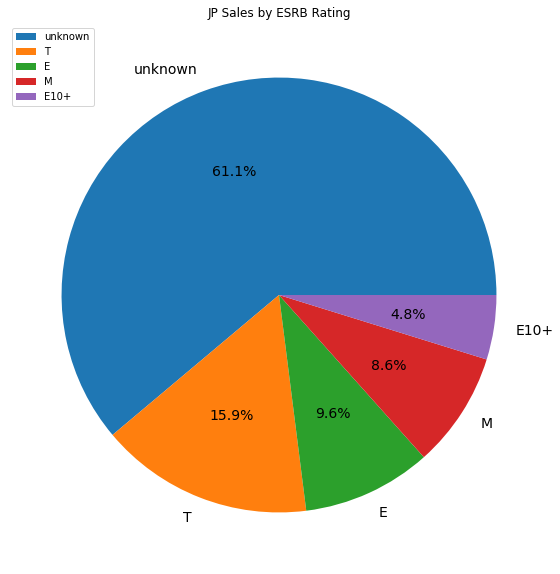

In [64]:

# Obtain the data slice containing the ESRB Rating and regional sales info, group data by ESRB Rating, sum the regional
# sales
df_rating = sample_data.loc[:,['rating', 'na_sales', 'eu_sales', 'jp_sales']]\
.groupby('rating')['na_sales', 'eu_sales', 'jp_sales'].sum()

# Obtain the ESRB Rating that will be plotted
plotted_ratings = df_rating['jp_sales'].sort_values(ascending=False)[:]

# Plot the data in a pie chart. Provide percentages.
plotted_ratings.plot(kind='pie', autopct='%1.1f%%', fontsize=14, figsize=(10,10), title='JP Sales by ESRB Rating')
plt.legend(loc='upper left')
plt.ylabel('')
plt.show()


Both the NA and EU regions appear to have very similar distributions of total sales for the same ESRB ratings. In both regions, video games rated `M` rating for mature are responsible for the highest sales. In both regions, roughly a third of video game sales are contributed by `M` rated games. Approximately 18% - 20% of video game sales are accounted for by games rated `E` for everyone, 13% of total sales is accounted for by games rated `T` for teen, and approximately 10% - 12% of sales are accounted for by games rated `E10+`. Additionally, nearly 22% of ESRB ratings in our dataset is unavailabe because of the `RP` (Rating Pending).

However, in the JP region the distribution of sales by ESRB rating is quite different. Over half of the ESRB ratings are unavailable, seeing as the `RP` label makes up 61.1% of the above pie chart for the JP region. Of the ratings that can be plotted, video games rated `T` for teen account for nearly 16% of total sales, which is fairly close to what was seen in the NA and EU regions. The `E` for everyone rating accounts for approximately 10% of total sales, which is about half the share that the `E` rating accounted for in the NA and EU regions. One of the biggest shockers is that video games rated `M` for mature only account for approximately 9% of total sales, whereas in the NA and EU regions `M` rated video games accounted for nearly a third of total sales. Finally, video games rate `E10+` account for approximately 5% of total sales in the JP region, which is about half the share seen for `E10+` video games in the NA or EU regions.

Ice should focus on selling `M` and `T` rated video games in both the NA and EU regions, and focus on selling `T` and `E` rated video games in the JP region. However, considering nearly a fifth of ratings are pending for the NA and EU regions, and over half of ratings are pending for the JP regions, accurate conclusions are very unlikely. There is no saying what the ratings could be for those pending values, which could easily change the size of the shares currently plotted.

<h2>Test the following hypotheses</h2>

After having analyzed the data above, let's test two hypotheses. The first hypothesis will be that the average user ratings for video games of the Xbox One and PC platforms are the same, and the second hypothesis will be that the average user ratings for video games of the Action and Sports genres are different.

<h3>Testing if average user ratings of Xbox One and PC video games are the same</h3>

The null hypothesis will state that the average user ratings for video games of the Xbox One and PC platforms are equivalent. Thus, the alternative hypothesis will state that the average user ratings for video games of the Xbox One and PC platforms are NOT equivalent.

We'll begin the test by obtaining two samples of data, which will contain the video games that are created for the Xbox One or a PC platforms. The two samples will be stored in `user_ratings_xone` and `user_ratings_pc`. Then, a t-test will be used to calculate the p-value that the average user ratings are equivalent. Both samples will be passed to the t-test function, as well as `equal_var=True`, since we're assuming that the variance of the two samples is the same. Finally, the resulting p-value will be used to determine if the null hypothesis can be rejected or not. The statistical significance level is assigned a value of 0.05, as that is a very common significance level. If the p-value is below the significance level of 0.05, the if-statement provided in the code block will display `"We reject the null hypothesis"`. If the p-value is greater than the significance level of 0.05, then the if-statement in the code block will display `"We can't reject the null hypothesis"`.

In [65]:
# Obtain the desired data slices for XOne and PC
user_ratings_xone = sample_data.loc[sample_data['platform'] == 'XOne', 'user_score'].dropna()
user_ratings_pc = sample_data.loc[sample_data['platform'] == 'PC', 'user_score'].dropna()

# Initialize the statistical significance level as 0.05
alpha = 0.05

# Run the t-test, passing both samples and equal_var=True
results = st.ttest_ind(
    user_ratings_xone,
    user_ratings_pc,
    equal_var = True)

# Print the p-value
print('p-value: ', results.pvalue)

# if-statement displaying the outcome
if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  0.10450507919348415
We can't reject the null hypothesis


The p-value of the t-test determining if the average user ratings of video games for the Xbox One or PC platforms are equivalent was calculated to be approximately 0.29, which is greater than the significance level of 0.05. Thus, the null hypothesis cannot be rejected, meaning that there is a decent chance that the average user ratings of video games for the Xbox One or PC platforms are equivalent.

Let's calcualte the average, variance, and standard deviation values for the user ratings of video games for both the Xbox One and PC platforms.

In [66]:
# Obtain the means for both samples and print
mean_xone = user_ratings_xone.mean()
mean_pc = user_ratings_pc.mean()
print('AVERAGE USER RATING: ')
print('Xbox One: ', mean_xone)
print('PC: ', mean_pc)
print()
# Obtain the standard deviations for both samples and print
std_xone = user_ratings_xone.std()
std_pc = user_ratings_pc.std()
print('STANDARD DEVIATIONS:')
print('Xbox One: ', std_xone)
print('PC: ', std_pc)
print()
# obtain the variance for both samples and print
var_xone = user_ratings_xone.var()
var_pc = user_ratings_pc.var()
print('VARIANCES:')
print('Xbox One: ', var_xone)
print('PC: ', var_pc)


AVERAGE USER RATING: 
Xbox One:  6.594545454545456
PC:  6.298360655737705

STANDARD DEVIATIONS:
Xbox One:  1.375138775500386
PC:  1.7032775214666138

VARIANCES:
Xbox One:  1.8910066518847013
PC:  2.901154315133451


The averages are fairly close to one another, and the difference between them is small enough to support that the averages being equal is probable to some extent.

<h3>Testing if average user ratings for Action and Sports video games are different</h3>

The null hypothesis will state that the average user ratings for video games of the Xbox One and PC platforms are equivalent. Thus, the alternative hypothesis will state that the average user ratings for video games of the Xbox One and PC platforms are NOT equivalent.

We'll begin the test by obtaining two samples of data, which are just the video games under the Action or Sports genre. The two samples will be stored in `action_ratings` and `sports_ratings`. Then, a t-test will be used to calculate the p-value. Both samples will be passed to the t-test function, as well as `equal_var=False`, since we're assuming that the variance of the two samples are NOT the same. Finally, the resulting p-value will be used to determine if the null hypothesis can be rejected or not. The statistical significance level is assigned a value of 0.05, as that is a very common significance level. If the p-value is below the significance level of 0.05, the if-statement provided will display `"We reject the null hypothesis"`. If the p-value is greater than the significance level of 0.05, then the if-statement will display `"We can't reject the null hypothesis"`.

In [67]:
# Obtain the desired data slices for Action and Sports genres
action_ratings = sample_data.loc[sample_data['genre'] == 'Action', 'user_score'].dropna()
sports_ratings = sample_data.loc[sample_data['genre'] == 'Sports', 'user_score'].dropna()

# Initialize the statistical significance level as 0.05
alpha = 0.05

# Run the t-test, passing both samples and equal_var=False
results = st.ttest_ind(
    action_ratings,
    sports_ratings,
    equal_var = False)

# Print the p-value
print('p-value: ', results.pvalue)

# if-statement displaying the outcome
if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")




p-value:  1.1825550382644557e-14
We reject the null hypothesis


The p-value of the t-test determining if the average user ratings of video games of the Action or Sports genres are equivalent was calculated to be 0.0000000000000279, which is significantly lower than the significance level of 0.05. Thus, the null hypothesis can be rejected, meaning that there is practically no probability that the average user ratings of video games of the Action and Sports genres are equivalent.

Let's calculate the average, variance, and standard deviation values for the user ratings of video games of both the Action or Sports genres.

In [68]:
# Obtain the means for both samples and print
mean_action = action_ratings.mean()
mean_sports = sports_ratings.mean()
print('AVERAGE USER RATING: ')
print('Action: ', mean_action)
print('Sports: ', mean_sports)
print()
# Obtain the standard deviations for both samples and print
std_action = action_ratings.std()
std_sports = sports_ratings.std()
print('VARIANCES:')
print('Action: ', std_action)
print('Sports: ', std_sports)
print()
# obtain the variance for both samples and print
var_action = action_ratings.var()
var_sports = sports_ratings.var()
print('STANDARD DEVIATIONS:')
print('Action: ', var_action)
print('Sports: ', var_sports)



AVERAGE USER RATING: 
Action:  6.760606060606061
Sports:  5.2251968503937

VARIANCES:
Action:  1.3778521903588419
Sports:  1.8566041925001269

STANDARD DEVIATIONS:
Action:  1.8984766584766581
Sports:  3.446979127609048


The average user ratings for both genres are not close to each other, which does not support the hyptothesis that there is a decent probability that the averages are equivalent. The sizeable difference between the averages supports rejecting the null hypothesis.

<h2>Conclusion</h2>

<h3>Actions taken</h3>

At the beginning of this report the necessary libraries and data were imported and loaded. The data was stored in the `games` DataFrame. After looking at the DataFrame's summary info and a preview of the first 20 rows of the data, it was determined that there were a few columns with missing values, as well as incorrect data types. The following columns contained missing values:

- name
- year_of_release
- genre
- critic_score
- user_score
- rating

Only 2 rows contained missing values in the `'name'` column, so they were simply removed. A small portion of the missing values in the `'year_of_release'` column were simply removed from the DataFrame since they accounted for such a small portion of the entire dataset. Once the missing values were removed from the `'year_of_release'` column, the data type for the `'year_of_release'` column was converted to `int64`, so that the values would be integers. After removal of the rows from the `'name'` and `'year_of_release'` columns, no rows remained that contained missing values in the `'genre'` column. Roughly a third of rows in the `'critic_score'` and `'user_score'` columns contained missing values, and therefore could not just be removed. However, I used interpolate to fill the missing values in using two known points. In the `'rating'` column I first filled any nan values to `'unknown'`. Then looking at the data I converted some of the ratings from other rating systems that had less than 10 values into the ESRB counter part. I also changed the `'unknown'` value to `'rp'` for Rating Pending as this would be a better fit. 

The last action taken before analysis could be started was that an additional column was added to the DataFrame that contained the total sales for each video game. This was done by summing the regional sales in the NA, EU, JP, and Other regions.

Once the data had been processed and currated for analysis, the following aspects of the data were examined:

- Distribution of games released by year
- Distribution of games released by platform
- Distribution of total sales based on year for each platform
- User rating correlation with total sales
- Critic rating correlation with total sales
- 5 most popular platforms by region
- 5 most popular genres by region
- ESRB rating effect on sales by region

Not only were tables utilized to group the data together for examinaton, but visual representations were created using the following plots:

- Bar Chart
- Scatter Plot
- Boxplot
- Pie Charts

Lastly, two hypotheses were also tested as to whether they could be rejected or not. The first hypothesis tested was that the average user rating for video games on the Xbox One or PC platform were the same. The second hypthesis tested was that the average user rating for video games of the Action or Sports genre were different. These hypotheses were tested using t-tests.

<h3>Final conclusion</h3>

After review of all the analysis performed throughout the report, a few conclusions were made, which are listed below:

User and critic rating correlations:

- No correlation between user ratings and total sales were seen except for the WiiU platform, which was still weak
- Very weak correlation between critic ratings and total sales

Popular platforms

- Platforms currently growing/leading sales are Xbox One and PS4

Genres

- Most popular genre is Action
- Shooter and Sports genres are also popular in the NA and EU regions
- Role-Playing genre is also popular in the JP region

ESRB Ratings

- ESRB ratings did have an affect on regional sales.
- Sales by ESRB Ratings were the same in NA and EU, but different in JP.

Hypotheses

- We reject the null hypothesis that the average user ratings of Xbox One and PC platforms are equivalent
- We cannot reject the null hypothesis that the average user ratings for Action and Sports genre are equivalent

Overall, determining if a video game will be successful in 2017 depends on the region, platform, genre, and ESRB rating. Video games will be successful if they are compatible with the Xbox One and PS4 platforms. If the video game is mainly sold in the JP region, then it will be successful if it is compatible with the 3DS platform. Video games of the Action genre will be the most successful. The Shooter and Sports genres will also be successful in the NA and EU regions, while the Role-Playing genre will be successful in the JP region. Lastly, video games of the rated M will be most popular in the NA and EU regions, while it was hard to conclude which ESRB rating is most popular in the JP region due to the large portion of the rating pending data.